In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## *Imports*

In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from category_encoders import MEstimateEncoder


%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [3]:
#Importando dados
data_teste = pd.read_csv("/kaggle/input/titanic/test.csv")
data_train = pd.read_csv("/kaggle/input/titanic/train.csv")

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## *Analise Inicial do Dataset*

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print (data_train.info())
print ()
print (data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Su

In [7]:
data_train.isnull().sum() # Analisando as colunas com valores faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_teste.isnull().sum() # Analisando as colunas com valores faltantes

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data = data_train.copy()
teste_data = data_teste.copy() # Copia para n alterar o banco de dados original
cols_drop = ['Name', 'Cabin', 'Ticket']
train = train_data.drop(cols_drop, axis = 1)
teste = teste_data.drop(cols_drop, axis = 1)

## *Feature Selection*

In [10]:
def data_cleaning(data):
    # Copiando banco de dados
    X = data.copy()

    # Classificando as features em num e cat
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Tratando dados NaN com imputers
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Imputando valores
    X[numerical_features] = num_imputer.fit_transform(X[numerical_features])
    X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

    return X
    
def make_mi_scores(X, y, discrete_features):
    X = X.copy()
    # Label encoding for categoricals
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

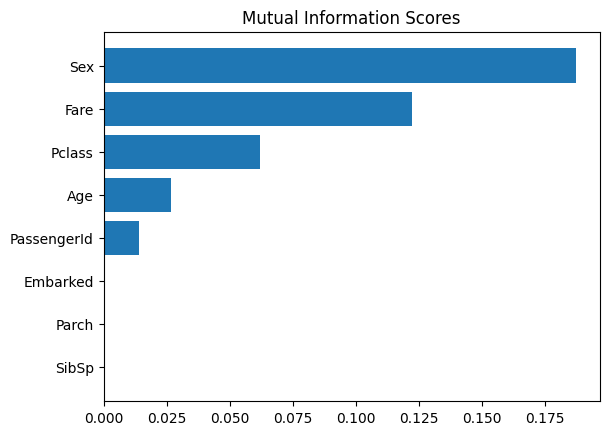

In [11]:
new_data = data_cleaning(train)

X = new_data.drop('Survived', axis=1)
y = new_data['Survived']
discrete = X.dtypes == int

scores = make_mi_scores(X, y, discrete)
plot_mi_scores (scores)

Text(0.5, 1.0, 'Distribuição de Fare por Sobrevivência')

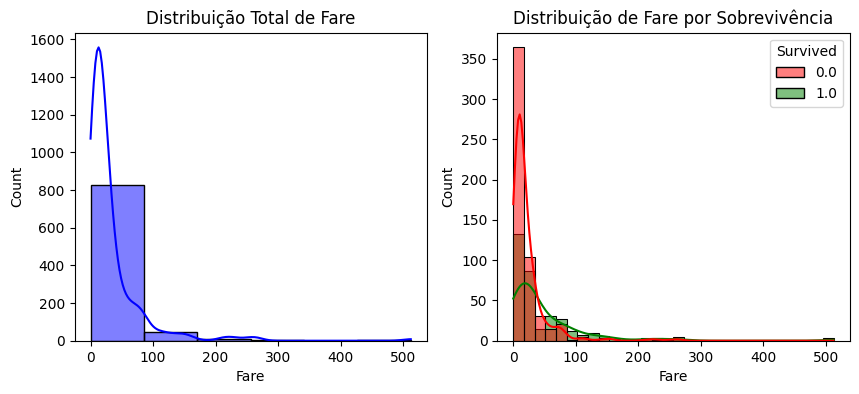

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(new_data['Fare'], bins =6, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribuição Total de Fare")
sns.histplot(new_data, x="Fare", hue="Survived", bins=30, kde=True, ax=axes[1], palette=["red", "green"])
axes[1].set_title("Distribuição de Fare por Sobrevivência")

In [13]:
dataS = new_data.loc[(new_data['Survived'] == 1)]
dataH = new_data.loc[(new_data['Sex'] == 'male')]
dataF = new_data.loc[(new_data['Sex'] == 'female')]

Text(0.5, 1.0, 'Distribuição Total de Idade entre os Sobreviventes')

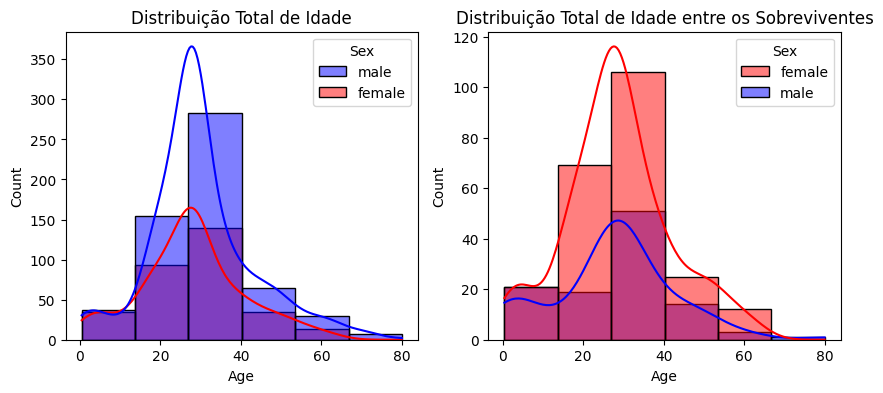

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(new_data, x="Age", hue="Sex", bins=6, kde=True, ax=axes[0], palette=["blue", "red"])
axes[0].set_title("Distribuição Total de Idade")

sns.histplot(dataS, x="Age", hue="Sex", bins=6, kde=True, ax=axes[1], palette=["red", "blue"])
axes[1].set_title("Distribuição Total de Idade entre os Sobreviventes")

Text(0.5, 1.0, 'Distribuição Total de Idade entre as Mulheres')

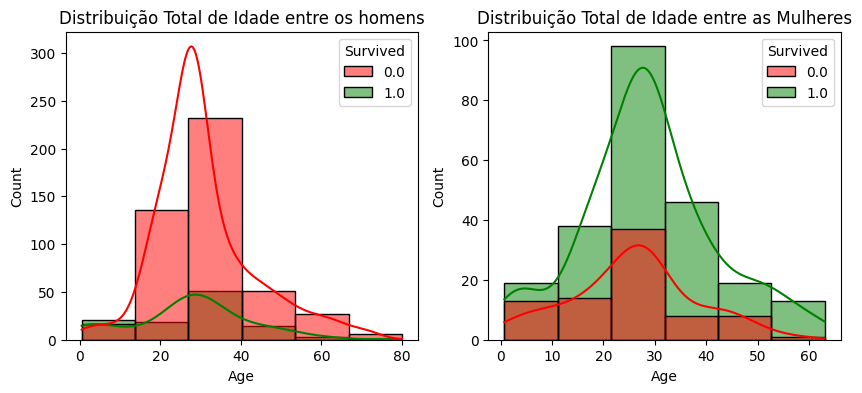

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(dataH, x="Age", hue="Survived", bins=6, kde=True, ax=axes[0], palette=["red", "green"])
axes[0].set_title("Distribuição Total de Idade entre os homens")

sns.histplot(dataF, x="Age", hue="Survived", bins=6, kde=True, ax=axes[1], palette=["red", "green"])
axes[1].set_title("Distribuição Total de Idade entre as Mulheres")

## *Feature Construction*

In [16]:
# Aqui vamos trabalhar para construir algumas novas features, como por exemplo deixar a coluna 'Name' utilizavel
# Usamos Split para separar a coluna name em 3 partes e depois em mais 2, assim separamos os Titles para utilizar e excluimos o resto.
train_construction = train_data.copy()
train_construction['Title'] = train_construction['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

teste_construction = teste_data.copy()
teste_construction['Title'] = teste_construction['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [17]:
train_construction.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
teste_construction.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [19]:
# Criando Feature Family que soma as colunas SibSp e Parch, e coluna IsAlone que é booleana indicando se o passageiro esta acompanhado
train_construction['Family'] = train_construction['SibSp'] + train_construction['Parch']
train_construction['IsAlone'] = train_construction['Family'] == 0

teste_construction['Family'] = teste_construction['SibSp'] + teste_construction['Parch']
teste_construction['IsAlone'] = teste_construction['Family'] == 0

In [20]:
cols_drop = ['Name', 'Cabin', 'Ticket']
train_construction = train_construction.drop(cols_drop, axis = 1)
teste_construction = teste_construction.drop(cols_drop, axis = 1)

In [21]:
new_feature = ['Family', 'Title', 'IsAlone']
# Passando as novas features para o df
new_data[new_feature] = train_construction[new_feature]

In [22]:
new_teste = data_cleaning(teste_construction)

## *Feature Extraction*

<Axes: xlabel='Age', ylabel='Fare'>

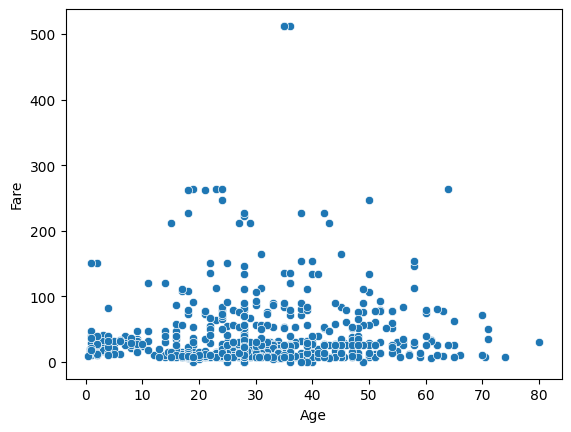

In [23]:
# Vamos analisar graficamente nossas colunas 'Age' e 'Fare'
sns.scatterplot(data=new_data, x='Age', y='Fare')

In [24]:
features=['Age', 'Fare']
cluster_data = new_data.loc[:, features]
cluster_filtered = cluster_data[cluster_data["Fare"] < 500]

cluster_teste_data = new_teste.loc[:, features]
cluster_teste_filtered = cluster_teste_data[cluster_teste_data["Fare"] < 500]

In [25]:
kmeans = KMeans(n_clusters=6, random_state=0)
cluster_filtered["Cluster"] = kmeans.fit_predict(cluster_filtered)

cluster_teste_filtered["Cluster"] = kmeans.fit_predict(cluster_teste_filtered)

In [26]:
# Juntando os dados criados ao dataframe de treino
new_data['Cluster'] = cluster_filtered['Cluster']
new_teste['Cluster'] = cluster_teste_filtered['Cluster']

Text(0.5, 1.0, 'Chance de sobrevivencia por Cluster')

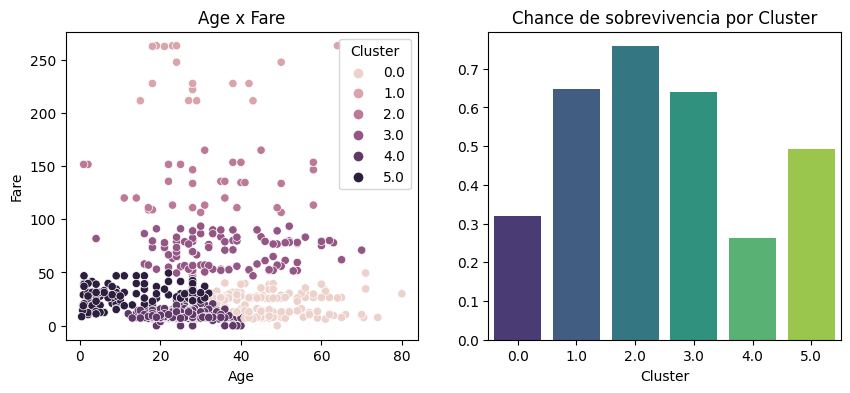

In [27]:
# Gerando um grafico 'Age x Fare' utilizando o Cluster como camada
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data=new_data, x='Age', y='Fare', hue='Cluster', ax=axes[0])
axes[0].set_title("Age x Fare")

survival_rates = new_data.groupby("Cluster")["Survived"].mean()
sns.barplot(x=survival_rates.index, y=survival_rates.values, ax=axes[1], palette="viridis")
axes[1].set_title("Chance de sobrevivencia por Cluster")

In [28]:
linhas_nulas = new_data.loc[new_data['Cluster'].isna()]
# Mostrando as linhas nulas para analise
linhas_nulas

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,IsAlone,Cluster
258,259.0,1.0,1.0,female,35.0,0.0,0.0,512.3292,C,0,Miss,True,NaN
679,680.0,1.0,1.0,male,36.0,0.0,1.0,512.3292,C,1,Mr,False,NaN
737,738.0,1.0,1.0,male,35.0,0.0,0.0,512.3292,C,0,Mr,True,NaN


In [29]:
linhas_nulas = new_teste.loc[new_teste['Cluster'].isna()]
# Mostrando as linhas nulas para analise
linhas_nulas

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,IsAlone,Cluster
343,1235.0,1.0,female,58.0,0.0,1.0,512.3292,C,Mrs,1.0,False,NaN


In [30]:
# Ápos analisar vimos que se encaixam mais no cluster 2
new_data = new_data.fillna(2)
new_teste = new_teste.fillna(5)

In [31]:
print('Cluster: ', new_data['Cluster'].loc[258])
print()
print('Cluster: ', new_data['Cluster'].loc[679])
print()
print('Cluster: ', new_data['Cluster'].loc[737])
print()
print('Cluster: ', new_teste['Cluster'].loc[343])

Cluster:  2.0

Cluster:  2.0

Cluster:  2.0

Cluster:  5.0


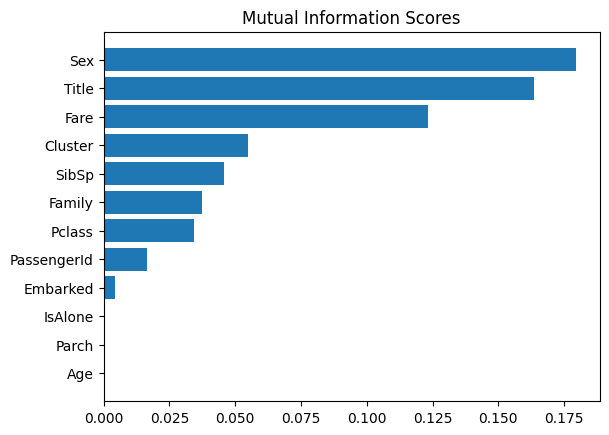

In [32]:
X = new_data.drop('Survived', axis=1)
y = new_data['Survived']
discrete = X.dtypes == int

scores = make_mi_scores(X, y, discrete)
plot_mi_scores (scores)

## *Realizando PCA das Features Age e Fare*

In [33]:
# Selecionando as Features
data_select = new_data[["Age","Fare"]]
# Definindo scaler
scaler = MinMaxScaler()
# Criando dataframe para armazenar as features escaladas
data_scaled = pd.DataFrame()

# Loop por onde as features passaram para serem escaladas
for feature in ["Age", "Fare"]:
    # Passando as colunas para o novo dataframe
    data_scaled[feature] = data_select[feature]
    # Utilizando o Scaler
    data_scaled[feature] = scaler.fit_transform(data_select[[feature]])

data_scaled.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


Text(0.5, 1.0, 'Fare Scaled')

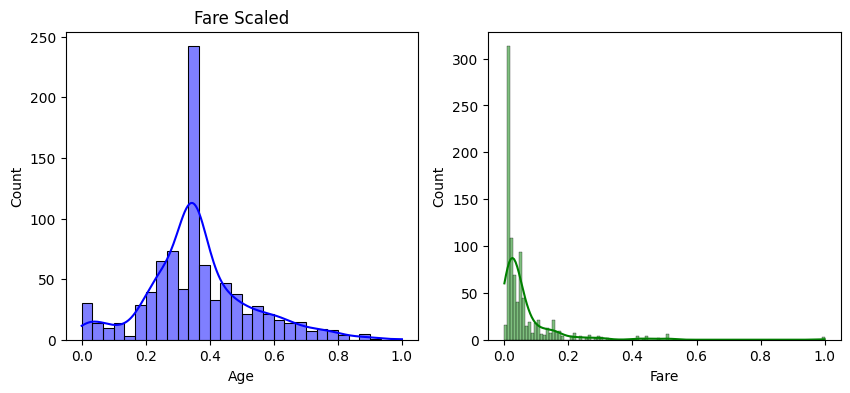

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data_scaled, x="Age", kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Scaled")
sns.histplot(data_scaled, x="Fare", kde=True, ax=axes[1], color='green')
axes[0].set_title("Fare Scaled")

In [35]:
# Criando o PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

pca_components = pd.DataFrame(pca.components_, 
                              columns=["age_scaled", "fare_scaled"], 
                              index=["PCA1", "PCA2"])

In [36]:
pca_components.head()
# Vemos que o PCA1 afeta mais a Idade e menos as Tarifa
# Já o PCA2 representa principalmente a tarifa, mas com influência negativa da idade 

,age_scaled,fare_scaled
PCA1,0.996175,0.087375
PCA2,-0.087375,0.996175


Os eixos foram significativamente alterados, pois agora não correspondem exatamente a "Age" ou "Fare", mas sim a novas combinações dessas variáveis. Isso pode ser útil para modelos de machine learning, pois permite capturar correlações ocultas entre idade e tarifa que não eram tão óbvias nos dados brutos.

In [37]:
# Conferindo quantos % da informação original é mantida
explained_variance = pca.explained_variance_ratio_

print(f"Variância explicada pelo PCA1: {explained_variance[0]:.2f}")
print(f"Variância explicada pelo PCA2: {explained_variance[1]:.2f}")

Variância explicada pelo PCA1: 0.74
Variância explicada pelo PCA2: 0.26


Vemos que menos de 90% da informação original é mantida no PCA1 portanto não podemos trocar as features Fare e Age por ela.

## *Target Encoding*

In [38]:
encoder = MEstimateEncoder(cols=["Title"], m=5.0)

data_encoded = new_data.copy()
data_encoded["Title_encoded"] = encoder.fit_transform(new_data[["Title"]], new_data["Survived"])
data_encoded = data_encoded.drop('Title', axis=1)

new_teste["Title_encoded"] = encoder.transform(new_teste[["Title"]])
new_teste = new_teste.drop('Title', axis=1)

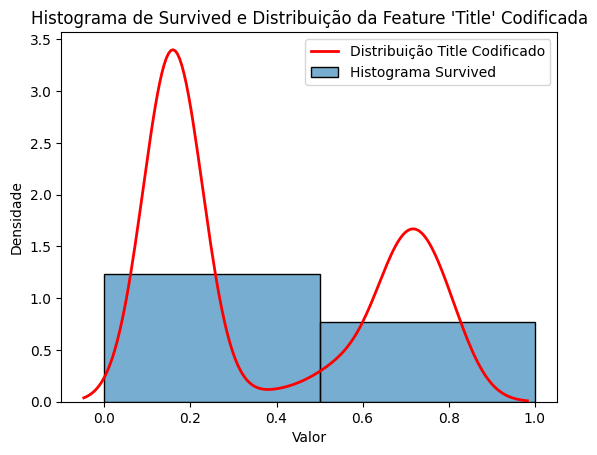

In [39]:
sns.histplot(data_encoded["Survived"], bins=2, kde=False, stat="density", alpha=0.6, label="Histograma Survived")
sns.kdeplot(data_encoded["Title_encoded"], color="red", linewidth=2, label="Distribuição Title Codificado")

plt.title("Histograma de Survived e Distribuição da Feature 'Title' Codificada")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend()

## *Treinando o modelo*

In [40]:
X_train = data_encoded.copy()
X_valid = new_teste.copy()

In [41]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,Cluster,Title_encoded
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,1,False,4.0,0.158849
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,1,False,3.0,0.776301
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,0,True,4.0,0.689407
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,1,False,3.0,0.776301
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,0,True,4.0,0.158849


In [42]:
X_valid.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone,Cluster,Title_encoded
0,892.0,3.0,male,34.5,0.0,0.0,7.8292,Q,0.0,True,0.0,0.158849
1,893.0,3.0,female,47.0,1.0,0.0,7.0000,S,1.0,False,4.0,0.776301
2,894.0,2.0,male,62.0,0.0,0.0,9.6875,Q,0.0,True,4.0,0.158849
3,895.0,3.0,male,27.0,0.0,0.0,8.6625,S,0.0,True,0.0,0.158849
4,896.0,3.0,female,22.0,1.0,1.0,12.2875,S,2.0,False,0.0,0.776301


In [43]:
def avaliate_pipes(data, encoder, model, numerical_imputer, categorical_imputer):
    
    # Definindo Feature e Target
    X = data.drop('Survived', axis=1) # Features
    y = data['Survived'] # Target

    # Classificando as features em num e cat
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns  
    categorical_features = X.select_dtypes(include=['object']).columns

    # Aplicando Encoder nas features categóricas
    if encoder == 'one-hot':
        cat_encoder = OneHotEncoder(handle_unknown='ignore')
    elif encoder == 'ordinal':
        cat_encoder = OrdinalEncoder()
    elif encoder == 'label':
        for col in categorical_features:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        cat_encoder = 'passthrough'
    else:
        raise ValueError('Encoder não reconhecido')

    # Tratando dados NaN com imputers
    numerical_transformer = SimpleImputer(strategy= numerical_imputer if numerical_imputer != 'zero' else 'constant', fill_value=0)
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= categorical_imputer )), # Trata das colunas categoricas utilizando um SimpleImputer para trocar os dados NaN 
    ( encoder, cat_encoder) # Utiliza o Encoder escolhido para transformar as colunas categoricas em Numericas
])
  
    # Criando um preprocessor
    preprocessor = ColumnTransformer(    # Processo anterior a aplicação do modelo, tratamento de dados, permite transformar colunas de forma independente
        transformers=[                   # transformers = ['nome', 'transformador', 'coluna']
            ('num', numerical_transformer, numerical_features),   # tranforma as numerical features com o numerical transformer
            ('cat', categorical_transformer, categorical_features)  # tranforma as categorical features com o categorical transformer
        ])
    
    # Criando um pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), # Definindo passos do pipe, 1º passa pelo preprocessor cujo vai transformar as colunas 
        ('model', model)                # Utilizando os Imputers para preencher os NaN's e realizar o encoder das categoricas
    ])                                  # 2º Passa os dados ja processados pelo model fazendo seu treino e entregando ao final seu Score.

    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    pipeline.fit(X,y)
    
    return pipeline, mean_score*100

In [44]:
max_score = 0

for model in [GradientBoostingClassifier(), RandomForestClassifier()]:
    for encoder in ['ordinal', 'one-hot']:
        print()
        for numerical_imputer in ['mean', 'median', 'constant', 'zero']:
            for categorical_imputer in ['most_frequent', 'constant']:
                pipeline, score = avaliate_pipes(X_train, encoder, model, numerical_imputer, categorical_imputer)
                print(f'Score: {score:.4}%, Model: {model}, Encoder: {encoder}, Numerical Imputer: {numerical_imputer}, Categorical Imputer: {categorical_imputer}')
                if score >= max_score:
                    max_score = score
                    B_model = model
                    B_encoder = encoder
                    B_Num = numerical_imputer
                    B_Cat = categorical_imputer
                else :max_score
            
print()

print(f'Melhor score: {max_score:.4}%')


Score: 78.02%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: mean, Categorical Imputer: most_frequent
Score: 78.13%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: mean, Categorical Imputer: constant
Score: 78.13%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: median, Categorical Imputer: most_frequent
Score: 78.02%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: median, Categorical Imputer: constant
Score: 77.68%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: constant, Categorical Imputer: most_frequent
Score: 78.02%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: constant, Categorical Imputer: constant
Score: 78.02%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: zero, Categorical Imputer: most_frequent
Score: 78.02%, Model: GradientBoostingClassifier(), Encoder: ordinal, Numerical Imputer: zer

In [45]:
print(B_model, B_encoder, B_Num, B_Cat)

RandomForestClassifier() one-hot mean constant


In [46]:
pipeline, score = avaliate_pipes(train, B_encoder, B_model, B_Num, B_Cat)

## *Gerando modelo para competição*

In [47]:
X_teste = X_valid
teste_ids = teste['PassengerId']
predictions = pipeline.predict(X_teste)
submission = pd.DataFrame({"PassengerId": teste_ids, "Survived": predictions})
submission.to_csv("submission.csv", index=False)